In [29]:
from collections import OrderedDict

import torch
from torch import nn
import torch.nn.functional as F

from torchvision.ops import misc as misc_nn_ops
from torchvision.ops import MultiScaleRoIAlign

import torchvision
from pathlib import Path
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from PIL import Image

import torchvision.transforms as transforms
import cv2

import bbox_visualizer as bbv

In [2]:
torchvision.__version__

'0.8.2'

In [3]:
model = torchvision.models.detection.retinanet_resnet50_fpn(pretrained=True)

Downloading: "https://download.pytorch.org/models/retinanet_resnet50_fpn_coco-eeacb38b.pth" to C:\Users\shubham/.cache\torch\hub\checkpoints\retinanet_resnet50_fpn_coco-eeacb38b.pth
100.0%


In [88]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [ ]:
model.eval()

In [43]:
dataset_path = Path("../../../dataset/object_detection/images")

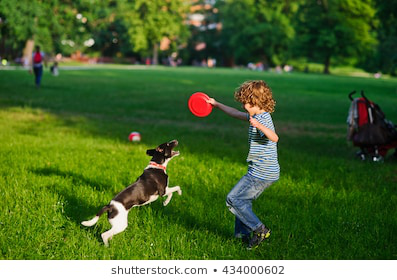

In [75]:
img = Image.open(dataset_path/"image_555.jpg")
img

In [76]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [77]:
tranformed_img = transform(img)

In [78]:
tranformed_img = tranformed_img.unsqueeze(0)

In [79]:
predictions = model(tranformed_img)

In [80]:
predictions

[{'boxes': tensor([[209.2923,  78.9676, 280.4734, 248.9030],
          [ 30.8674,  45.6822,  44.8485,  86.7205],
          [ 50.6228,  61.3369,  59.5736,  76.5390],
          [254.6433,  61.3133, 264.4738,  71.4136],
          [247.9072,  61.7474, 261.7007,  71.0491],
          [ 46.4298,  55.6508,  54.6660,  73.9439],
          [ 54.1312,  52.5403,  61.7943,  74.1313],
          [ 14.7633,  55.9617,  23.0434,  67.8654],
          [169.0250,  52.3302, 180.0970,  67.0644],
          [ 48.6693,  53.3741,  58.8966,  75.1835],
          [ 19.5440,  54.8379,  25.4889,  68.2202],
          [ 48.0205,  61.2623,  57.2201,  73.4969],
          [ 21.3902,  53.3603,  27.4789,  68.8051],
          [ 21.6914,  40.2679,  33.6538,  73.6795],
          [346.3848,  89.6546, 396.1647, 162.5862],
          [ 22.2075,  41.5771,  49.9996,  86.7805],
          [246.3617,  61.3630, 256.0559,  70.4486],
          [283.2313,  64.8300, 292.8101,  72.3096],
          [274.0650,  64.9714, 282.6030,  73.0590],
   

In [81]:
scores = predictions[0]["scores"].tolist()

In [82]:
filtered_indexes = [i for i, e in enumerate(scores) if e > 0.5]
scores = [score for score in scores if score > 0.5]

[0, 1, 2, 64, 65, 79, 82]

In [83]:
boxes = predictions[0]["boxes"].tolist()
filtered_boxes = [b for i, b in enumerate(boxes) if i in filtered_indexes]
int_boxes = []
for box in filtered_boxes:
    box = [int(c) for c in box]
    int_boxes.append(box)
int_boxes

[[209, 78, 280, 248],
 [30, 45, 44, 86],
 [50, 61, 59, 76],
 [81, 140, 183, 246],
 [346, 89, 395, 164],
 [187, 91, 213, 117],
 [128, 131, 141, 142]]

In [97]:
labels = predictions[0]["labels"].tolist()
filtered_labels = [l for i, l in enumerate(labels) if i in filtered_indexes]
print(filtered_labels)
filtered_labels = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in filtered_labels]
print(filtered_labels)

[1, 1, 1, 18, 27, 34, 37]
['person', 'person', 'person', 'dog', 'backpack', 'frisbee', 'sports ball']


In [98]:
img_bbox = img
for box in int_boxes:
    img_bbox = bbv.draw_rectangle(np.asarray(img_bbox), box)

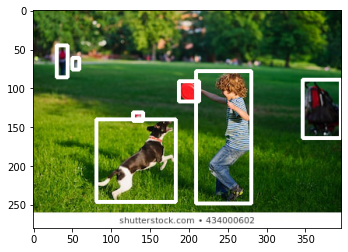

In [99]:
pil_img = Image.fromarray(img_bbox)

plt.imshow(img_bbox)
plt.show()